# Decison Tree

## Data untuk buah mangga

Berikut adalah contoh data sintetis untuk membandingkan tiga jenis mangga berdasarkan dua fitur: Ukuran (cm) dan Berat (gram), dengan total 15 data dan 3 kelas (jenis mangga).

| ID | Ukuran (cm) | Berat (gram) | Jenis Mangga |
| -- | ----------- | ------------ | ------------ |
| 1  | 8.0         | 300          | Harumanis    |
| 2  | 7.5         | 280          | Harumanis    |
| 3  | 8.2         | 310          | Harumanis    |
| 4  | 7.8         | 290          | Harumanis    |
| 5  | 8.5         | 320          | Harumanis    |
| 6  | 5.2         | 180          | Manalagi     |
| 7  | 5.0         | 170          | Manalagi     |
| 8  | 5.5         | 185          | Manalagi     |
| 9  | 5.3         | 175          | Manalagi     |
| 10 | 5.1         | 165          | Manalagi     |
| 11 | 6.0         | 220          | Golek        |
| 12 | 6.2         | 230          | Golek        |
| 13 | 6.5         | 240          | Golek        |
| 14 | 6.1         | 225          | Golek        |
| 15 | 6.3         | 235          | Golek        |


## 📏 Fitur 1: Ukuran (cm)

### ✅ Threshold ≈ **11.6 cm**

**Split Data:**

* **Group Left (≤ 11.6):** No 1–5
  → *Harumanis* = 5
  → (Pure group)

* **Group Right (> 11.6):** No 6–15
  → *Manalagi* = 5
  → *Golek* = 5

---

### 🔸 Entropy Awal

Semua kelas seimbang (5-5-5):

$$
Entropy(D) = -3 \cdot \left( \frac{1}{3} \cdot \log_2 \frac{1}{3} \right) ≈ \boxed{1.585}
$$

---

### 🔸 Entropy(Left)

Semua *Harumanis* (pure):

$$
Entropy(Left) = -1 \cdot \log_2 1 = \boxed{0}
$$

---

### 🔸 Entropy(Right)

Kelas seimbang (5 Manalagi, 5 Golek):

$$
Entropy(Right) = -\frac{5}{10} \log_2 \frac{5}{10} - \frac{5}{10} \log_2 \frac{5}{10} = \boxed{1.0}
$$

---

### 🔹 **Information Gain:**

$$
IG = 1.585 - \left( \frac{5}{15} \cdot 0 + \frac{10}{15} \cdot 1 \right) = \boxed{0.918}
$$

---

### 🔸 Gini(D)

$$
Gini(D) = 1 - 3 \cdot \left( \frac{1}{3} \right)^2 = \boxed{0.667}
$$

---

### 🔸 Gini(Left)

(Pure group):

$$
Gini(Left) = \boxed{0}
$$

---

### 🔸 Gini(Right)

$$
Gini(Right) = 1 - \left( \frac{5}{10} \right)^2 - \left( \frac{5}{10} \right)^2 = \boxed{0.5}
$$

---

### 🔹 **Gini Split:**

$$
Gini_{split} = \frac{5}{15} \cdot 0 + \frac{10}{15} \cdot 0.5 = \boxed{0.333}
$$

---

## ⚖️ Fitur 2: Berat (gram)

### ✅ Threshold = **330 gram**

**Split Data:**

* **Group Left (≤ 330):**
  No 1–5 (*Harumanis*), No 11–15 (*Golek*) → 10 data
  → *Harumanis* = 5
  → *Golek* = 5

* **Group Right (> 330):**
  No 6–10 (*Manalagi*) → 5 data
  → *Manalagi* = 5 (Pure group)

---

### 🔸 Entropy Awal:

$$
Entropy(D) = -3 \cdot \left( \frac{1}{3} \cdot \log_2 \frac{1}{3} \right) = \boxed{1.585}
$$

---

### 🔸 Entropy(Left):

$$
Entropy(Left) = -\frac{5}{10} \log_2 \frac{5}{10} - \frac{5}{10} \log_2 \frac{5}{10} = \boxed{1.0}
$$

---

### 🔸 Entropy(Right):

(Pure Manalagi):

$$
Entropy(Right) = -1 \cdot \log_2 1 = \boxed{0}
$$

---

### 🔹 **Information Gain:**

$$
IG = 1.585 - \left( \frac{10}{15} \cdot 1 + \frac{5}{15} \cdot 0 \right) = \boxed{0.918}
$$

---

### 🔸 Gini(D):

$$
Gini(D) = 1 - 3 \cdot \left( \frac{1}{3} \right)^2 = \boxed{0.667}
$$

---

### 🔸 Gini(Left):

$$
Gini(Left) = 1 - \left( \frac{5}{10} \right)^2 - \left( \frac{5}{10} \right)^2 = \boxed{0.5}
$$

---

### 🔸 Gini(Right):

(Pure group):

$$
Gini(Right) = 0
$$

---

### 🔹 **Gini Split:**

$$
Gini_{split} = \frac{10}{15} \cdot 0.5 + \frac{5}{15} \cdot 0 = \boxed{0.333}
$$

---

## ✅ Ringkasan Akhir:

| Fitur  | Threshold | Information Gain | Gini Split |
| ------ | --------- | ---------------- | ---------- |
| Ukuran | 11.6 cm   | 0.918            | 0.333      |
| Berat  | 330 gram  | 0.918            | 0.333      |

---

### 🔎 **Kesimpulan:**

Baik fitur **Ukuran** maupun **Berat** memiliki nilai *Information Gain* dan *Gini Split* **yang sama kuat** untuk dijadikan pemisah pertama (root split) dalam decision tree berdasarkan data mangga.


In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.preprocessing import LabelEncoder

# Data
data = {
    'Ukuran': [8.0, 7.5, 8.2, 7.8, 8.5,
               5.2, 5.0, 5.5, 5.3, 5.1,
               6.0, 6.2, 6.5, 6.1, 6.3],
    'Berat':  [300, 280, 310, 290, 320,
               180, 170, 185, 175, 165,
               220, 230, 240, 225, 235],
    'Jenis': ['Harumanis', 'Harumanis', 'Harumanis', 'Harumanis', 'Harumanis',
              'Manalagi', 'Manalagi', 'Manalagi', 'Manalagi', 'Manalagi',
              'Golek', 'Golek', 'Golek', 'Golek', 'Golek']
}

# Buat DataFrame
df = pd.DataFrame(data)

# Encode label (string -> angka)
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Jenis'])

# Fitur dan target
X = df[['Ukuran', 'Berat']]
y = df['Label']

# Buat model decision tree
clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf.fit(X, y)

# Tampilkan decision tree sebagai teks
tree_rules = export_text(clf, feature_names=list(X.columns), show_weights=True)
print(tree_rules)


|--- Berat <= 202.50
|   |--- weights: [0.00, 0.00, 5.00] class: 2
|--- Berat >  202.50
|   |--- Ukuran <= 7.00
|   |   |--- weights: [5.00, 0.00, 0.00] class: 0
|   |--- Ukuran >  7.00
|   |   |--- weights: [0.00, 5.00, 0.00] class: 1



## Visualisasi Splitting


=== Prediksi 2 Data Mangga Baru ===
Data 1: Ukuran=6.4 cm, Berat=238 g → Prediksi: Golek
Data 2: Ukuran=5.4 cm, Berat=178 g → Prediksi: Manalagi

=== Visualisasi Decision Boundary ===


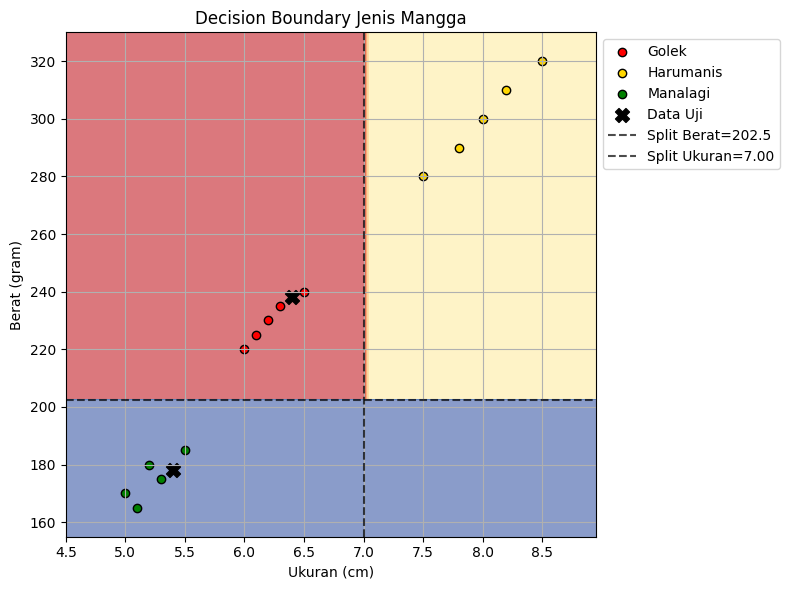

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# === Data Mangga ===
data = {
    'Ukuran': [8.0, 7.5, 8.2, 7.8, 8.5,
               5.2, 5.0, 5.5, 5.3, 5.1,
               6.0, 6.2, 6.5, 6.1, 6.3],
    'Berat':  [300, 280, 310, 290, 320,
               180, 170, 185, 175, 165,
               220, 230, 240, 225, 235],
    'Jenis': ['Harumanis', 'Harumanis', 'Harumanis', 'Harumanis', 'Harumanis',
              'Manalagi', 'Manalagi', 'Manalagi', 'Manalagi', 'Manalagi',
              'Golek', 'Golek', 'Golek', 'Golek', 'Golek']
}

df = pd.DataFrame(data)

# Encode label
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Jenis'])

# Fitur dan target
X = df[['Ukuran', 'Berat']]
y = df['Label']

# Decision Tree
clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf.fit(X, y)

# === Data uji baru ===
uji_baru = pd.DataFrame({
    'Ukuran': [6.4, 5.4],
    'Berat': [238, 178]
})

# Prediksi
prediksi = clf.predict(uji_baru)
hasil = le.inverse_transform(prediksi)

print("\n=== Prediksi 2 Data Mangga Baru ===")
for i, (u, b) in enumerate(zip(uji_baru['Ukuran'], uji_baru['Berat'])):
    print(f"Data {i+1}: Ukuran={u} cm, Berat={b} g → Prediksi: {hasil[i]}")

# === Visualisasi Decision Boundary ===
print("\n=== Visualisasi Decision Boundary ===")
plot_colors = ['red', 'gold', 'green']  # Warna per kelas
plot_step = 0.05

x_min, x_max = X['Ukuran'].min() - 0.5, X['Ukuran'].max() + 0.5
y_min, y_max = X['Berat'].min() - 10, X['Berat'].max() + 10

xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

grid = np.c_[xx.ravel(), yy.ravel()]
grid_df = pd.DataFrame(grid, columns=['Ukuran', 'Berat'])
Z = clf.predict(grid_df)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.6)

# Plot data training
for label, color in zip(np.unique(y), plot_colors):
    idx = np.where(y == label)
    plt.scatter(X.iloc[idx]['Ukuran'], X.iloc[idx]['Berat'],
                c=color, edgecolor='k', label=le.inverse_transform([label])[0])

# Plot data uji
plt.scatter(uji_baru['Ukuran'], uji_baru['Berat'],
            c='black', marker='X', s=100, label='Data Uji')

# Tambahkan garis splitting dari decision tree
def plot_splits(tree, feature_names):
    drawn_lines = set()
    for node in range(tree.node_count):
        feature = tree.feature[node]
        threshold = tree.threshold[node]
        if feature != -2:  # bukan leaf node
            feat_name = feature_names[feature]
            if (feat_name, threshold) not in drawn_lines:
                if feat_name == 'Ukuran':
                    plt.axvline(x=threshold, color='k', linestyle='--', alpha=0.7, label=f"Split {feat_name}={threshold:.2f}")
                elif feat_name == 'Berat':
                    plt.axhline(y=threshold, color='k', linestyle='--', alpha=0.7, label=f"Split {feat_name}={threshold:.1f}")
                drawn_lines.add((feat_name, threshold))

plot_splits(clf.tree_, list(X.columns))

plt.xlabel("Ukuran (cm)")
plt.ylabel("Berat (gram)")
plt.title("Decision Boundary Jenis Mangga")
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.grid(True)
plt.tight_layout()
plt.show()


## Visualisasi Splitting Setelah ada 2 Data Baru


=== Prediksi 2 Data Mangga Baru ===
Data 1: Ukuran=6.4 cm, Berat=238 g → Prediksi: Golek
Data 2: Ukuran=5.4 cm, Berat=178 g → Prediksi: Manalagi


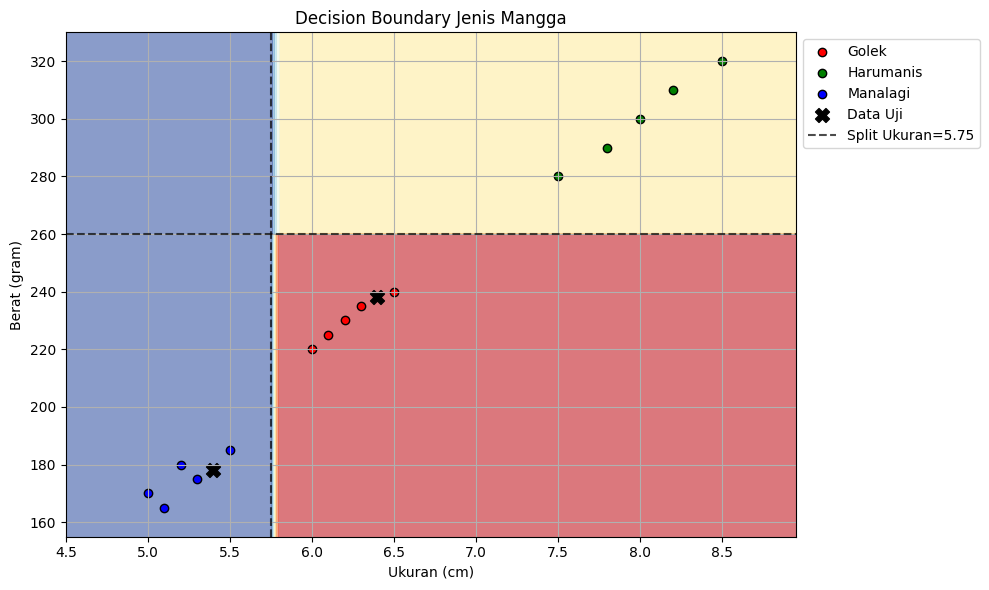

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# === Data Mangga ===
data = {
    'Ukuran': [8.0, 7.5, 8.2, 7.8, 8.5,   # Harumanis
               5.2, 5.0, 5.5, 5.3, 5.1,   # Manalagi
               6.0, 6.2, 6.5, 6.1, 6.3],  # Golek
    'Berat':  [300, 280, 310, 290, 320,
               180, 170, 185, 175, 165,
               220, 230, 240, 225, 235],
    'Jenis': ['Harumanis']*5 + ['Manalagi']*5 + ['Golek']*5
}

df = pd.DataFrame(data)

# Encode label jenis mangga
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Jenis'])

# Fitur dan target
X = df[['Ukuran', 'Berat']]
y = df['Label']

# Train Decision Tree
clf = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
clf.fit(X, y)

# === Data Uji Baru ===
uji_baru = pd.DataFrame({
    'Ukuran': [6.4, 5.4],
    'Berat': [238, 178]
})

# Prediksi
prediksi = clf.predict(uji_baru)
hasil = le.inverse_transform(prediksi)

print("\n=== Prediksi 2 Data Mangga Baru ===")
for i, (uk, br) in enumerate(zip(uji_baru['Ukuran'], uji_baru['Berat'])):
    print(f"Data {i+1}: Ukuran={uk} cm, Berat={br} g → Prediksi: {hasil[i]}")

# === Visualisasi Decision Boundary ===
plot_colors = ["r", "g", "b"]  # Sesuaikan dengan jumlah kelas
plot_step = 0.05

x_min, x_max = X['Ukuran'].min() - 0.5, X['Ukuran'].max() + 0.5
y_min, y_max = X['Berat'].min() - 10, X['Berat'].max() + 10

xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

grid = np.c_[xx.ravel(), yy.ravel()]
grid_df = pd.DataFrame(grid, columns=['Ukuran', 'Berat'])
Z = clf.predict(grid_df)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.6)

# Plot titik data training
for label in np.unique(y):
    idx = np.where(y == label)
    plt.scatter(X.iloc[idx]['Ukuran'], X.iloc[idx]['Berat'],
                c=plot_colors[label], edgecolor='k',
                label=le.inverse_transform([label])[0])

# Plot data uji
plt.scatter(uji_baru['Ukuran'], uji_baru['Berat'],
            c='black', marker='X', s=100, label='Data Uji')

# Tambahkan garis split dari decision tree
def plot_splits(tree, feature_names):
    drawn_lines = set()
    for node in range(tree.node_count):
        feature = tree.feature[node]
        threshold = tree.threshold[node]
        if feature != -2:  # Bukan leaf
            feat_name = feature_names[feature]
            if (feat_name, threshold) not in drawn_lines:
                if feat_name == 'Ukuran':
                    plt.axvline(x=threshold, color='k', linestyle='--', alpha=0.7,
                                label=f"Split {feat_name}={threshold:.2f}" if len(drawn_lines) < 1 else "")
                elif feat_name == 'Berat':
                    plt.axhline(y=threshold, color='k', linestyle='--', alpha=0.7,
                                label=f"Split {feat_name}={threshold:.1f}" if len(drawn_lines) < 1 else "")
                drawn_lines.add((feat_name, threshold))

plot_splits(clf.tree_, list(X.columns))

plt.xlabel("Ukuran (cm)")
plt.ylabel("Berat (gram)")
plt.title("Decision Boundary Jenis Mangga")
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.grid(True)
plt.tight_layout()
plt.show()


## Visualisasi Decision Tree dalam bentuk gambar

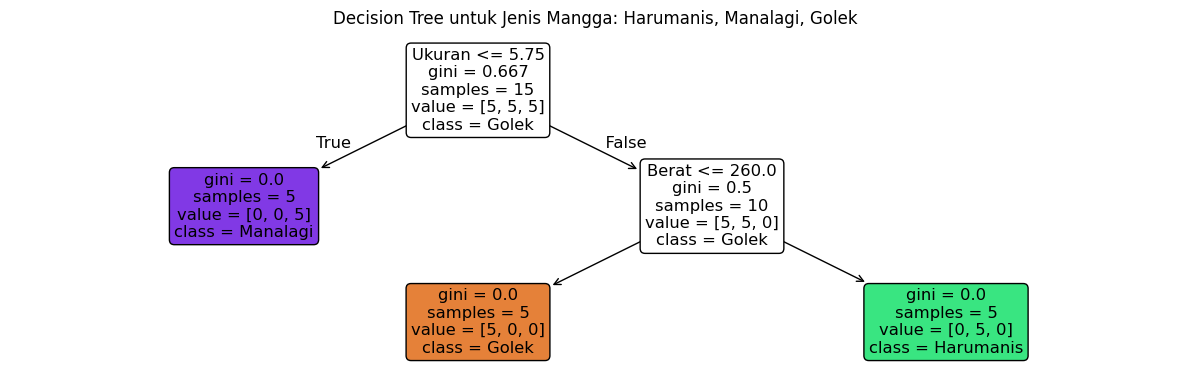

In [4]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# === Visualisasi Decision Tree untuk data mangga ===
plt.figure(figsize=(12, 4))
plot_tree(
    clf,
    feature_names=["Ukuran", "Berat"],
    class_names=le.classes_,  # kelas: ['Golek', 'Harumanis', 'Manalagi']
    filled=True,
    rounded=True,
    impurity=True  # menampilkan nilai Gini
)

plt.title("Decision Tree untuk Jenis Mangga: Harumanis, Manalagi, Golek")
plt.tight_layout()
plt.show()
